<a href="https://colab.research.google.com/github/barry80417/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%8302%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境準備

In [ ]:
from google.colab import files
#上傳CSV
uploaded = files.upload()
import io
wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))

In [50]:
import pandas as pd
import numpy as np
wine = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

1 - fixed acidity:固定酸度

2 - volatile acidity：揮發性酸度

3 - citric acid：檸檬酸

4 - residual sugar：殘糖

5 - chlorides：氯化物

6 - free sulfur dioxide：游離二氧化硫

7 - total sulfur dioxide：總二氧化硫

8 - density：密度

9 - pH：酸鹼度

10 - sulphates：硫酸鹽

11 - alcohol Output variable (based on sensory data):酒精輸出變量

12 - quality (score between 0 and 10)：品質

## 檢視有無缺失值

In [ ]:
wine.count()

## 敘述性分析

In [71]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 看各個資料關聯性

In [ ]:
#@title train data relation
#看訓練資料中是否有所關聯
import matplotlib.pyplot as plt
import seaborn as sns
corr = wine.corr()
cmap = sns.diverging_palette(200, 0, as_cmap = True)
sns.heatmap(
    corr,
    cmap=cmap,
    square = False,
    cbar_kws = {'shrink': .9}, #顏色條大小
    ax = plt.subplots(figsize =(12,10))[1],
    annot = True,
    annot_kws = {'fontsize':12} #字體大小
)

## 參考 https://dsgeeksdotcom.wordpress.com/2020/04/29/predicting-the-quality-of-red-wine-using-python/ 查取outlier盒形圖

In [ ]:
fig, ax = plt.subplots(ncols = 5,nrows = 2, figsize=(15,5))
ax = ax.flatten()
index = 0
for i in wine.columns:
  if i != 'quality':
    sns.boxplot(y = i, data=wine, ax=ax[index])
    index +=1
plt.tinght_layout(pad = 0.4)
plt.show()

## 資料正規化


In [52]:
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler() #Max-Min正規化

In [53]:
wine['fixed acidity'] = minmax.fit_transform(wine['fixed acidity'].values.reshape(-1,1))
wine = wine.drop(['citric acid','free sulfur dioxide'],axis = 1)
wine['residual sugar'] = minmax.fit_transform(wine['residual sugar'].values.reshape(-1,1))
wine['total sulfur dioxide'] = minmax.fit_transform(wine['total sulfur dioxide'].values.reshape(-1,1))

## quality區分好壞

In [54]:
wine.loc[wine['quality']>=7,'qual']='good'
wine.loc[wine['quality']<7,'qual']='bad'

In [41]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = wine.drop(['quality','qual'], axis = 1)
y = wine['qual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.875     , 0.9375    , 0.85546875, 0.92578125, 0.92156863])

## 用圖表看品質是否資料不平衡

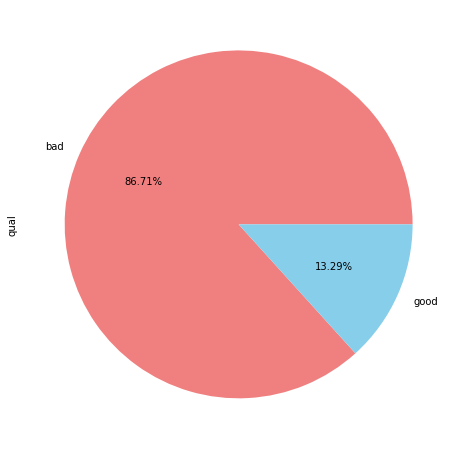

In [44]:
plt.figure(figsize = (10,8))
y_train.value_counts().plot(kind = 'pie',colors = ['lightcoral','skyblue'],autopct = '%1.2f%%')

資料不平衡處理

In [48]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train,y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)